In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

**Model architecture:**

Creating a sequential model with three encoder layers and three decoder layers.

The input layer takes a flattened MNIST image of size 784 (28x28 pixels) as input. The encoder layers use the 'relu' activation function, while the decoder layers use the 'sigmoid' activation function. We compile the autoencoder using the 'adam' optimizer and the 'binary_crossentropy' loss function.

In [35]:
#Specifying only the architecture of the encoder
model=Sequential([                                                      #dense means fully connected layer in ANN
                  #Encoder layers
                  Dense(units=128, input_shape=(784,), activation='relu'), # 1 encoder layer with 128 nodes with relu activation, input shape is an 784
                  Dense(units=64, activation='relu'),                   # 2nd encoder layer with 64 nodes with relu activation
                  Dense(units=32, activation='relu', name='encoder_output'),                  # 3rd encoder layer with 32 
                  #Decoder layers
                  Dense(units=64, activation='relu'),                    # 1st decoder layer with 64 nodes with relu activation,
                  Dense(units=128, activation='relu'),                   # 2nd decoder layer with 128 nodes with relu activation
                  Dense(units=784, activation='sigmoid')                  # Output layer with 784 nodes with sigmoid activation 
                  
])

**Why not using softmax at the output layer?**

In the context of autoencoders, the activation function used in the output layer depends on the type of data that the autoencoder is trained on.

The sigmoid activation function is commonly used for binary classification problems, where the output is a single binary value (0 or 1). It maps the input value to a range between 0 and 1, which can be interpreted as the probability of the input belonging to the positive class.

In the case of autoencoders, the input images are grayscale images with pixel values normalized between 0 and 1. Since the output of the autoencoder is also an image with pixel values between 0 and 1, the sigmoid activation function is a good choice for the output layer.

On the other hand, the softmax activation function is commonly used for multi-class classification problems, where the output is a probability distribution over multiple classes. It maps the input value to a range between 0 and 1 and normalizes the output so that the sum of all output values equals 1.

Therefore, in the context of autoencoders for image reconstruction, the sigmoid activation function is usually used in the output layer, while softmax is more suitable for classification problems.

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 encoder_output (Dense)      (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dense_37 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

**Loss function in the autoencoders:**

Autoencoders are typically used for dimensionality reduction and reconstruction of input data, not for classification. The output of the autoencoder is a reconstructed version of the input, and the quality of the reconstruction is evaluated using a loss metric such as mean squared error (MSE) or binary cross-entropy (BCE). The lower the value of the loss metric, the better the reconstruction quality. In the code I provided, the loss metric used is MSE, and the training and validation loss values are reported during training.

Next, we load the MNIST dataset and normalize the data. We then train the autoencoder using the 'fit' method on the training data, with a batch

In [40]:
# compile the autoencoder
model.compile(optimizer='adam', loss='binary_crossentropy')

**Loading, preprocessing and splitting the MNIST dataset**

In [41]:
# load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

**Training the model with the preprocessed data**

In [42]:
# train the autoencoder
model.fit(x_train, x_train,epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 24ms/step - loss: 0.2534 - val_loss: 0.1710
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1518 - val_loss: 0.1379
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1328 - val_loss: 0.1256
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1238 - val_loss: 0.1189
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1182 - val_loss: 0.1144
Epoch 6/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1137 - val_loss: 0.1108
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1103 - val_loss: 0.1079
Epoch 8/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1078 - val_loss: 0.1055
Epoch 9/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1057 - val_loss: 0.1036
Epoch 10/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1037 - val_lo

**Visualising the original image and reconstructed image**

313/313 [==============================] - 1s 2ms/step


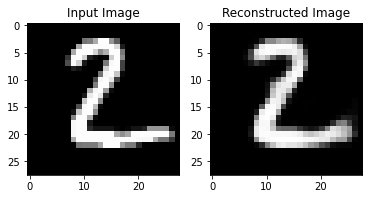

In [44]:
import matplotlib.pyplot as plt

# Get the reconstructed images
reconstructed_imgs = model.predict(x_test)

# Choose one image to visualize
img_index = 1

# Reshape the input and reconstructed images to their original shape
input_img = x_test[img_index].reshape(28, 28)
reconstructed_img = reconstructed_imgs[img_index].reshape(28, 28)

# Plot the input and reconstructed images side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(input_img, cmap='gray')
ax[0].set_title('Input Image')
ax[1].imshow(reconstructed_img, cmap='gray')
ax[1].set_title('Reconstructed Image')
plt.show()


**Obtaining the reduced dimensions:**

The reduced dimension of the image is obtained from the encoder model, which maps the input image to a lower-dimensional latent space. To access the reduced dimension, you can use the predict() method of the encoder model on your input data. 



In [47]:
# Get the encoder model from the autoencoder
encoder = Model(inputs=model.input, outputs=model.get_layer('encoder_output').output)

# Get the reduced dimension of the input images
encoded_imgs = encoder.predict(x_test)

# Choose one image to visualize
img_index = 1

# Reshape the input and reconstructed images to their original shape
print(x_test[img_index].shape)
print(encoded_imgs[img_index].shape)

313/313 [==============================] - 1s 2ms/step
(784,)
(32,)


You can see that the flattened data of 784 is reduced to 32 here!! 